<a href="https://colab.research.google.com/github/mtleis/Tensorflow-blog/blob/master/TF01_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Background
---
Machine Learning is used nowadays to answer complex questions and to build intelligent systems. Scientists around the world are feeding such systems with huge amounts of data. Since those scientists are going deep into their data, they refer to the learning process as **Deep Learning**. Example applications of Deep learning today, is to understand the content of images, natural language, and speech.<br>
Deep Learning methods also go by the name of deep neural networks. We feed millions of data instances into a network of neurons. Our neurons network is called a 'model'. Such model learns to recognize patterns from the raw data instances input. The representations of data is constructed automatically in deep learning and that is what distinguishes it out from conventional machine learning methods.<br>


# Introdcution
--- 
Google's deep learning framework is called **TensorFlow**. It is the second generation system at Google. Tensorflow succeeds the DistBelief project that was initialized in 2011. TensorFlow was released in November 2015 and it became the leading system for doing deep learning.<br>
One interesting aspect of TensorFlow is that users can download pre-trained models. Such deep neural nets are aleady trained and users can apply it to their data.<br>
By now you may be curious what does the name TensorFlow mean. In fact, Tensors are the standard way of representing data in deep learning. Tensors are multi-dimensional arrays. For example an RGB image has Tensors, i.e. 3 dimensional arrays, with each pixel having three values corresponding to red, green and blue components.<br>
We understood what Tensors are. But what does 'Flow' means. Actually, computation in TensorFlow is approached as a dataflow graph. In such graphs, nodes represent operations and edges represent data (tensors). So tensors are 'flowing' around the system. From there came the name **TensorFlow**. <br>
The core of TensorFlow is in C++, and it has two primary high-level frontend languages as interfaces for expressing and executing the computation graphs. The most developed and widely adopted interface language is Python. The C++ frontend provides a low-level API useful for embedded systems and similar applicaitons.<br>
TensorFlow comes with TesnorBoard. Tensorboard is a simple visualization tools that runs in the browser.<br>
One strength of TensorFlow is its modularity. It comes with abstraction libraries offering high-level access. We can think of TensorFlow with respect to other frameworks as we think about 'Object-Oriented' programming with respect to functional programming. <br>
In the rest of this article we will learn all basic things about Tensorflow. First we discuss how to Install Tensorflow, then we follow the traditions by creating a 'Hello World!' program. Finally we build a simple neural network composed of one layer and one neuron.

Saving tf_logo_social.png to tf_logo_social (2).png


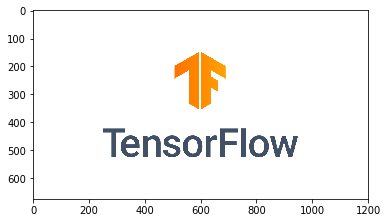

In [0]:
#@title Tensorflow logo
# !wget https://www.google.com/url?sa=i&rct=j&q=&esrc=s&source=imgres&cd=&cad=rja&uact=8&ved=2ahUKEwjcqMyAtprlAhUGaFAKHUXiA48QjRx6BAgBEAQ&url=https%3A%2F%2Fwww.tensorflow.org%2F&psig=AOvVaw3MfBArzEbELhwASJG1qKVi&ust=1571096854025673

from google.colab import files
uploaded = files.upload()
#for fn in uploaded.keys():
   #print('User uploaded file "{name}" with length {length} bytes'.format(
   #   name=fn, length=len(uploaded[fn])))
  
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("tf_logo_social.png")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

# Installing Tensorflow
---


The simple and easy way to install is by using the pip installation. The drawback with pip installation is that specific versions of some packages will be installed to satisfy dependencies. <br>

In [0]:
pip install tensorflow

One way to avoid installing using pip, is to install $virtualenv$.

In [0]:
pip install virtualenv

     |████████████████████████████████| 3.3MB 4.9MB/s 


In order to install TensorFlow using virtualenv, we need first to create the virtual environment. For example we can create a local folder 'envs' to install all of our virtualenvs. Then we will use $virtualenv$ command a create a new virtual environment named $tensorflow$.

```
cd ~
mkdir ~/envs
virtualenv ~/envs/tesnsorflow
```

In [0]:
# creating a virtual environment in google co-lab
!source /root/envs; 
!virtualenv /root/envs/tensorflow


/bin/bash: /root/envs: No such file or directory
Using base prefix '/usr'
New python executable in /root/envs/tensorflow/bin/python3
Also creating executable in /root/envs/tensorflow/bin/python
Installing setuptools, pip, wheel...
done.


After creating the virtual environment we need to activate it by running the $activate$ command by calling it from inside the **bin** directory.

```
source /root/envs/tensorflow/bin/activate
```

You will notice that the prompt is now proceeded by **(tensorflow)**:
```
(tensorflow)$
```

You can now install tensorflow inside the virtualenv:
```
(tensorflow)$ pip install tensorflow
```

Finally you can deactivate the virtual environment by running the **deactivate** command:
```
(tensorflow)$ deactivate
```


In [0]:
!source /root/envs/tensorflow/bin/activate


If you have CUDA-8 or you would like to benefit from the gpu capabilities of google colab, you can install the gpu version of tensorflow:

In [0]:
pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 74kB/s 
     |████████████████████████████████| 3.8MB 33.2MB/s 
     |████████████████████████████████| 450kB 44.8MB/s 
ERROR: tensorflow 1.15.0rc3 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0rc3 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


# Hello World
---


Now that we have learned how to install tensorflow locally or on Google Co-lab, we will follow the traditions and start with a 'Hello World' program!<br>
Of course you might need to check whether tensorflow is ready and what version is installed:
```
import tensorflow as tf
print(tf.__version__)
```

In [0]:
import tensorflow as tf
print(tf.__version__)

1.15.0-rc3


In [0]:
import tensorflow as tf
# define two constants and combine them
h = tf.constant("Hello")
w = tf.constant("World!")
hw = h + w

# Session object acts as an interface to Tensorflow
with tf.Session() as sess:
  # This actually does the summation of the two strings
  ans = sess.run(hw)
print(ans)

b'HelloWorld!'


If you had a look at the previous example, you may be wondering what does the 'hw' object contains.<br>
If you think of standard python string, you might think that 'hw' contains the 'Hello World' string. Let's check!

In [0]:
# standard python strings
h = 'Hello'
w = 'World!'
hw = h+w
print(hw)

HelloWorld!


In [0]:
# In tensorflow
h = tf.constant('Hello')
w = tf.constant('World!')
hw = h+w 
print(hw)

Tensor("add_1:0", shape=(), dtype=string)


As you can see the 'hw' is a Tensor object! We will learn later how the addition operation is actually added to a graph of computations to be done at a later stage ("add_1:0"). For now it is sufficient to know that the  Session object plays a role as an interface to the Tensorflow framework. The 'run' function of Session is the one that does the actual addition of the two constant strings h and w.

# A simple Neural Network Model
---

Now that we have seen a simple 'Hello World' example, we are going to take one step further and develop a simple neural network model. We will learn our model to predict the solution of a simple straight-line equation $𝑦=𝑥−2$.<br>
In this example, we will import tensorflow and numpy. In addition we import $keras$. $keras$ is a framework in Tensorflow. It is used to create nerual-networks as a set of Sequential layers. <br>


```
import tensorflow as tf
import numpy as np
from tensorflow import keras
```
In order to create a model we will use `keras.Sequential`. This function takes one parameter that defines a single layer in our network. The layer is of type $keras.layers.Dense$. $Dense$ takes $2$ parameters. The first defines the number of neurons in our layer ($units=1$), and the second parameter is called **input_shape**. We define `input_shape` as a list with a single value $1$.<br>

```
# we create a model, using Sequential object from keras framework,
# We create one layer. This layer has 1 neuron, and its input_shape is 1 value
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
```

The created model stored in a variable called `model` needs to be compiled.
In the compile function, we define two parameters. a loss function and an optimizer function. <br>
As a loss function we will use the `mean_squared_error`. As for the optimizer function, we are using the `sgd`, short for `stochastic gradient descent`.<br>

```
# we compile with a loss function (mean squared error)
# and an optimizer function (stochastic gradient descent)
model.compile(optimizer='sgd', loss='mean_squared_error')
```

Let's provide some data to our model. We will manually solve the equation $y=x-2$ for several values of $x$.

if $x = -1$ , then $ y = -1 -2 = -3$.<br>
if $x = 0$ , then $ y = 0 - 2  = -2$.<br>
if $x = 1$ , then $ y = 1 - 2 = -1$.<br>
if $x = 2$ , then $ y = 2 - 2 = 0$.<br>
if $x = 3$ , then $ y = 3 - 2 = 1$.<br>
if $x = 4$ , then $ y = 4 - 2 = 2$.<br>
Now we fit the values of $x$ and $y$ into float array vectors, using the numpy package:

```
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0,4.0],    dtype = float)
ys = np.array([-3.0, -2.0, -1.0, 0.0, 1.0, 2.0], dtype = float)
```

Now we will train our model, using 1000 epochs as a parameter to the `fit` function.
```
# Train the model
model.fit(xs, ys, epochs = 1000)
```

In order to predict the value for a new unkown variable, we invoke the predict funciton.

```
# predict for a new un-trained x = 10
model.predict([10.0])
```
The complete code goes here. We test our new model with a new value for x = 10. We expect to see a value very close to 8. (Y = 10 - 2 = 8).

In [0]:
# A nerual network to learn the equation y = x - 2
import tensorflow as tf
import numpy as np
# keras to create nn as a set of Sequential layers
from tensorflow import keras

# we create a model, using Sequential object from keras framework,
# We create one layer, and that layer has 1 neuron, and its input_shape is 1 value
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

# we compile with a loss function (mean squared error)
# and an optimizer function (stochastic gradient descent)
model.compile(optimizer='sgd', loss='mean_squared_error')

# providing the data
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0,4.0], dtype = float)
ys = np.array([-3.0, -2.0, -1.0, 0.0, 1.0, 2.0], dtype = float)

# Train the model
model.fit(xs, ys, epochs = 1000, verbose = 0)

# predict for a new unknown x
x = 10
print('For X = ' , x , ', Y = ', *model.predict([x])[0])

For X =  10 , Y =  7.9998646


# Conclusion
In this article we learned about the importance of Machine Learning and Deep Learning. We presented one of the top Frameworks for machine learning, i.e. Google's Tensorflow introduced since 2014. <br>
We learned how to install Tensorflow, and saw a traditional 'Hello World!' application. In addition, we developed our first simple neural network with one layer and one neuron.<br>
In the following articles we will discuss the computation graph model of Tensorflow. We will see how the addition operation of 'h' and 'w' is actually added to a graph of computations. In addition we will see more simple models and learn more about the basics of Tensorflow.